In [7]:
import main
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import time
import sklearn
import keras
import pickle

Using TensorFlow backend.


# MNIST Dataset

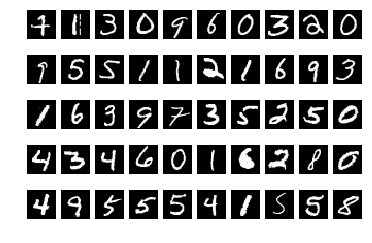

In [5]:
import main

#Load mnist dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

main.plot_grid(x_train, (5,10), cmap = 'gray')

# CIFAR10 dataset

170500096/170498071 [==============================] - 152s 1us/step


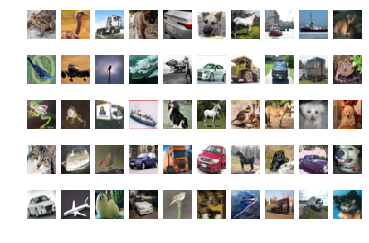

In [7]:
import main

#Load cifar 10 dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

main.plot_grid(x_train, (5,10), cmap = 'gray')

# Captcha dataset

Image shape:  (954, 45, 250)


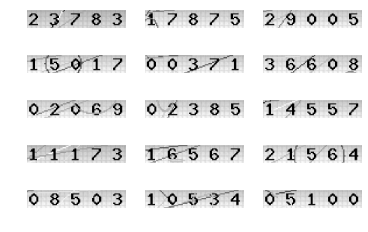

In [10]:
with open('captchas.pkl','rb') as f:
    x_train, y_train = pickle.load(f)

print('Image shape: ', x_train.shape)    
    
main.plot_grid(x_train, (5,3), cmap = 'gray_r')

# MNIST Using ANN Network

In [53]:
import main
import keras

#Load mnist dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

#Convert to float
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
#Rescale X
x_train /= 255
x_test /= 255
#Number of classes
num_classes = 10

#Convert to one hot
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

#Create model
model = main.ANN(
        network_sizes = [100,50],
        loss = 'categorical_crossentropy', 
        optimizer = 'adam',
        activation = 'relu',
        metrics = ['accuracy'],
        n_out = 10
        )    

#Train model
model.fit_model(
        x_train.reshape(-1,(28*28)).astype('float32'),
        y_train,
        batch_size = 400,
        epochs = 4,
        #validation_split = 0.01
        x_test = x_test.reshape(-1,(28*28)).astype('float32'),
        y_test = y_test, 
        )

#Evaluate model
model.eval(
        x_test.reshape(-1,(28*28)).astype('float32'),
        y_test
        )

Train on 60000 samples, validate on 10000 samples
Epoch 1/4
60000/60000 [==============================] - 10s 164us/step - loss: 0.4631 - acc: 0.8644 - val_loss: 0.1984 - val_acc: 0.9424
Epoch 2/4
60000/60000 [==============================] - 2s 36us/step - loss: 0.1616 - acc: 0.9527 - val_loss: 0.1457 - val_acc: 0.9568
Epoch 3/4
60000/60000 [==============================] - 2s 31us/step - loss: 0.1103 - acc: 0.9678 - val_loss: 0.1175 - val_acc: 0.9654
Epoch 4/4
10000/10000 [==============================] - 0s 44us/step


[0.10887334854844957, 0.9683]

Loss evolution


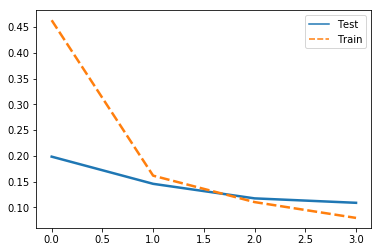

In [54]:
print('Loss evolution')
model.plot_loss()

Accuracy evolution


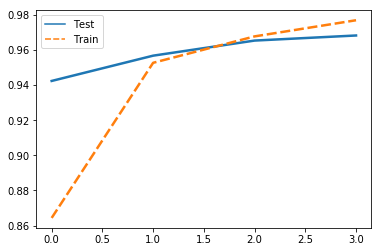

In [55]:
print('Accuracy evolution')
model.plot_acc()

Model evalutaion


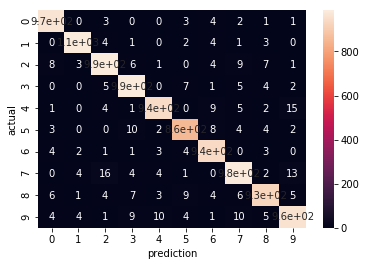

In [56]:
print('Model evalutaion')
model.plot_logits(x_test.reshape(-1,(28*28)),y_test)

# ANN on SIN wave

In [10]:
import main
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

n = 500000

points = np.linspace(start = 0,stop = 1.5*n/20 * np.pi, num = n)

x = np.sin(points[:-25])

y = np.sin(points[25:])

X = x.reshape(-1,25)
Y = y[::25].reshape(-1,1)

x_train,x_test,y_train,y_test = train_test_split(X, Y, shuffle = False,test_size = 0.2)

model = main.ANN(
    network_sizes = [30,15],
    activation='relu',
    dropout = 0.1,
    optimizer = 'adam',
    loss = 'mean_squared_error',
    metrics = None,
    n_out = 1
)

model.fit_model(
    x_train = x_train,
    y_train = y_train,
    batch_size = 200,
    epochs = 30,
    #validation_split = 0.01,
    x_test = x_test,
    y_test = y_test,
    verbose = 1
)

Train on 15999 samples, validate on 4000 samples
Epoch 1/30
15999/15999 [==============================] - 1s 78us/step - loss: 0.4136 - val_loss: 0.0422
Epoch 2/30
15999/15999 [==============================] - 0s 16us/step - loss: 0.0937 - val_loss: 0.0272
Epoch 3/30
15999/15999 [==============================] - 0s 13us/step - loss: 0.0567 - val_loss: 0.0162
Epoch 4/30
15999/15999 [==============================] - 0s 12us/step - loss: 0.0424 - val_loss: 0.0087
Epoch 5/30
15999/15999 [==============================] - 0s 13us/step - loss: 0.0323 - val_loss: 0.0057
Epoch 6/30
15999/15999 [==============================] - 0s 13us/step - loss: 0.0288 - val_loss: 0.0072
Epoch 7/30
15999/15999 [==============================] - 0s 13us/step - loss: 0.0254 - val_loss: 0.0035
Epoch 8/30
15999/15999 [==============================] - 0s 13us/step - loss: 0.0228 - val_loss: 0.0059
Epoch 9/30
15999/15999 [==============================] - 0s 12us/step - loss: 0.0209 - val_loss: 0.0033
Epoch 

Loss evolution


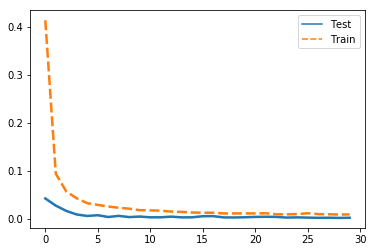

In [11]:
print('Loss evolution')
model.plot_loss()

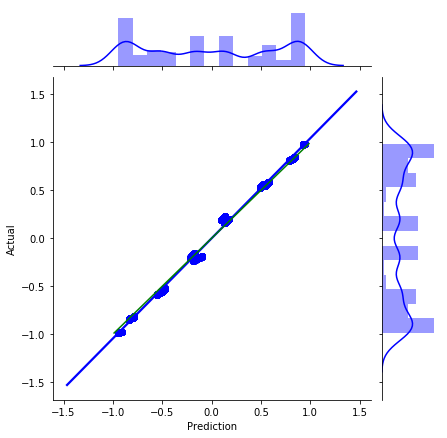

In [12]:
model.plot_scatter(x_test,y_test)

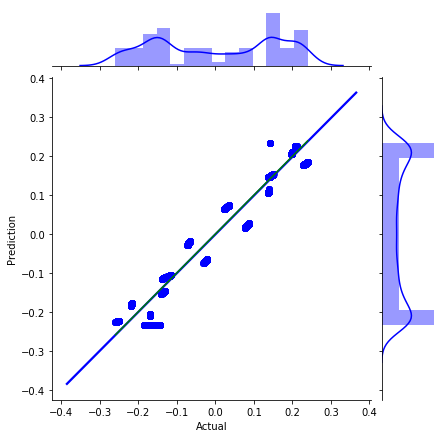

In [13]:
model.plot_scatter_var(x_test,y_test)

# MNIST Using CNN-2D Network

In [4]:
import keras
import main

#Load mnist dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

#Convert to float
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
#Rescale X
x_train /= 255
x_test /= 255

#Number of classes
num_classes = 10

#Convert to one hot
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = main.CNN(
        network_sizes = [50,25],
        filters = [5,5],
        kernels = [(4,4),(2,2)],
        pool_size = (2,2),
        activation='relu',
        activation_conv = keras.activations.relu,
        dropout=0,
        optimizer = 'adam',
        loss = 'categorical_crossentropy',
        metrics = ['accuracy'],
        n_out = 10
    )

model.fit_model(
        x_train = x_train.reshape(-1,28,28,1),
        y_train = y_train,
        batch_size = 200,
        epochs = 5,
        #validation_split = 0.01,
        x_test = x_test.reshape(-1,28,28,1),
        y_test = y_test, 
        verbose = 1
)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 26s 440us/step - loss: 0.3601 - acc: 0.9020 - val_loss: 0.1145 - val_acc: 0.9684
Epoch 2/5
60000/60000 [==============================] - 25s 423us/step - loss: 0.0837 - acc: 0.9759 - val_loss: 0.0693 - val_acc: 0.9775
Epoch 3/5
60000/60000 [==============================] - 21s 356us/step - loss: 0.0562 - acc: 0.9838 - val_loss: 0.0725 - val_acc: 0.9772
Epoch 4/5
60000/60000 [==============================] - 22s 360us/step - loss: 0.0421 - acc: 0.9874 - val_loss: 0.0620 - val_acc: 0.9794
Epoch 5/5
60000/60000 [==============================] - 23s 382us/step - loss: 0.0322 - acc: 0.9902 - val_loss: 0.0618 - val_acc: 0.9795


Loss evolution


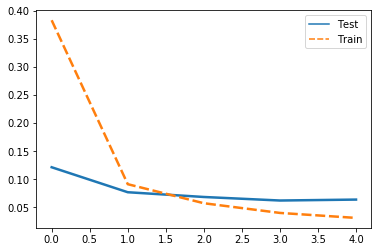

In [3]:
print('Loss evolution')
model.plot_loss()

Accuracy evolution


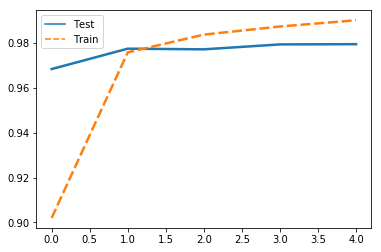

In [5]:
print('Accuracy evolution')
model.plot_acc()

Model evalutaion


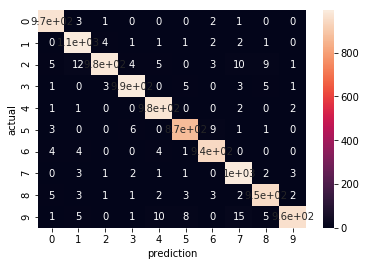

In [6]:
print('Model evalutaion')
model.plot_logits(x_test.reshape(-1,28,28,1),y_test)

# CIFAR10 Using CNN-2D Network¶

In [32]:
import keras
import main

#Load mnist dataset
#(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

#Convert to float
X_train = x_train.astype('float32')
X_test = x_test.astype('float32')
#Rescale X
X_train /= 255
X_test /= 255

#Number of classes
num_classes = 10

#Convert to one hot
Y_train = keras.utils.to_categorical(y_train, num_classes)
Y_test = keras.utils.to_categorical(y_test, num_classes)

model = main.CNN(
        network_sizes = [75,50],
        filters = [32,16,8],
        kernels = [(4,4),(3,3),(2,2)],
        pool_size = (2,2),
        activation='relu',
        activation_conv = keras.activations.relu,
        dropout=0,
        optimizer = 'adam',
        loss = 'categorical_crossentropy',
        metrics = ['accuracy'],
        n_out = 10
    )

model.fit_model(
        x_train = X_train,
        y_train = Y_train,
        batch_size = 200,
        epochs = 5,
        #validation_split = 0.01,
        x_test = X_test,
        y_test = Y_test, 
        verbose = 1
)

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 76s 2ms/step - loss: 1.6696 - acc: 0.4027 - val_loss: 1.4590 - val_acc: 0.4819
Epoch 2/5
50000/50000 [==============================] - 86s 2ms/step - loss: 1.3497 - acc: 0.5189 - val_loss: 1.3734 - val_acc: 0.5149
Epoch 3/5
50000/50000 [==============================] - 118s 2ms/step - loss: 1.1677 - acc: 0.5883 - val_loss: 1.7654 - val_acc: 0.4312
Epoch 4/5
50000/50000 [==============================] - 103s 2ms/step - loss: 1.0314 - acc: 0.6367 - val_loss: 1.1606 - val_acc: 0.5874
Epoch 5/5
50000/50000 [==============================] - 93s 2ms/step - loss: 0.9387 - acc: 0.6692 - val_loss: 1.1949 - val_acc: 0.5918


Loss evolution


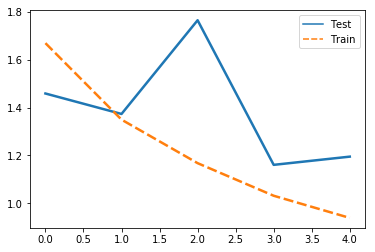

In [36]:
print('Loss evolution')
model.plot_loss()

Accuracy evolution


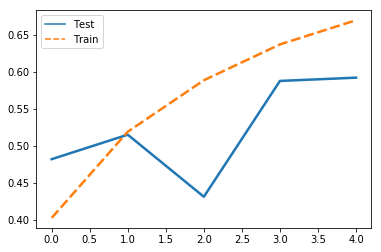

In [37]:
print('Accuracy evolution')
model.plot_acc()

Model evalutaion


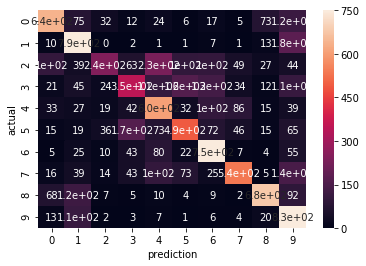

In [38]:
print('Model evalutaion')
model.plot_logits(X_test,Y_test)

# MNIST Using RNN Network

In [6]:
import main
import keras

#Load mnist dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

#Convert to float
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
#Rescale X
x_train /= 255
x_test /= 255

#Number of classes
num_classes = 10

#Convert to one hot
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = main.RNN(
    network_sizes = [30,15],
    lstm_cells = [28],
    activation='relu',
    rnn_type = 'GRU',
    dropout = 0.1,
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy'],
    n_out = 10
)

model.fit_model(
    x_train = x_train,
    y_train = y_train,
    batch_size = 200,
    epochs = 10,
    #validation_split = 0.01,
    x_test = x_test,
    y_test = y_test,    
    verbose = 1
)



Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 10s 160us/step - loss: 1.7252 - acc: 0.3845 - val_loss: 1.0878 - val_acc: 0.6130
Epoch 2/10
60000/60000 [==============================] - 7s 124us/step - loss: 1.0049 - acc: 0.6308 - val_loss: 0.7401 - val_acc: 0.7312
Epoch 3/10
60000/60000 [==============================] - 7s 113us/step - loss: 0.6897 - acc: 0.7509 - val_loss: 0.4932 - val_acc: 0.8149
Epoch 4/10
60000/60000 [==============================] - 7s 121us/step - loss: 0.5211 - acc: 0.8212 - val_loss: 0.3279 - val_acc: 0.8928
Epoch 5/10
60000/60000 [==============================] - 7s 109us/step - loss: 0.4086 - acc: 0.8694 - val_loss: 0.2471 - val_acc: 0.9248
Epoch 6/10
60000/60000 [==============================] - 7s 111us/step - loss: 0.3291 - acc: 0.8980 - val_loss: 0.1937 - val_acc: 0.9411
Epoch 7/10
60000/60000 [==============================] - 7s 117us/step - loss: 0.2789 - acc: 0.9153 - val_loss: 0.1702 -

Loss evolution


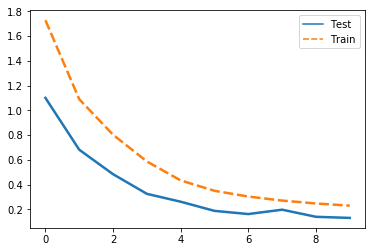

In [7]:
print('Loss evolution')
model.plot_loss()

Accuracy evolution


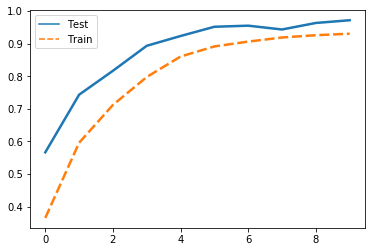

In [8]:
print('Accuracy evolution')
model.plot_acc()

Model evalutaion


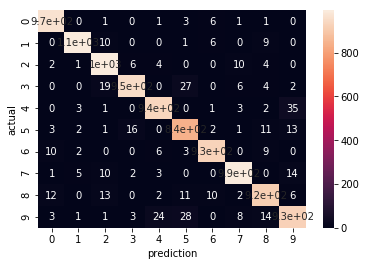

In [9]:
print('Model evalutaion')
model.plot_logits(x_test,y_test)

# RNN on SIN wave

In [9]:
import main
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

n = 500000

points = np.linspace(start = 0,stop = 1.5*n/20 * np.pi, num = n)

x = np.sin(points[:-25])

y = np.sin(points[25:])

X = x.reshape(-1,25,1)
Y = y[::25].reshape(-1,1)

x_train,x_test,y_train,y_test = train_test_split(X, Y, shuffle = False,test_size = 0.2)

model = main.RNN(
    network_sizes = [30,15],
    lstm_cells = [28],
    activation='relu',
    rnn_type = 'GRU',
    dropout = 0.1,
    optimizer = 'adam',
    loss = 'mean_squared_error',
    metrics = None,
    n_out = 1
)

model.fit_model(
    x_train = x_train,
    y_train = y_train,
    batch_size = 200,
    epochs = 30,
    #validation_split = 0.01,
    x_test = x_test,
    y_test = y_test,
    verbose = 1
)

Train on 15999 samples, validate on 4000 samples
Epoch 1/30
15999/15999 [==============================] - 3s 193us/step - loss: 0.3509 - val_loss: 0.0413
Epoch 2/30
15999/15999 [==============================] - 2s 94us/step - loss: 0.1363 - val_loss: 0.0534
Epoch 3/30
15999/15999 [==============================] - 2s 102us/step - loss: 0.1007 - val_loss: 0.0296
Epoch 4/30
15999/15999 [==============================] - 1s 90us/step - loss: 0.0859 - val_loss: 0.0232
Epoch 5/30
15999/15999 [==============================] - 1s 86us/step - loss: 0.0787 - val_loss: 0.0116
Epoch 6/30
15999/15999 [==============================] - 1s 89us/step - loss: 0.0746 - val_loss: 0.0095
Epoch 7/30
15999/15999 [==============================] - 1s 89us/step - loss: 0.0689 - val_loss: 0.0119
Epoch 8/30
15999/15999 [==============================] - 1s 86us/step - loss: 0.0685 - val_loss: 0.0126
Epoch 9/30
15999/15999 [==============================] - 1s 93us/step - loss: 0.0667 - val_loss: 0.0147
Epoc

Loss evolution


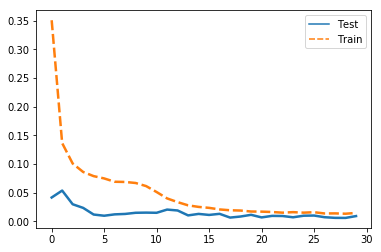

In [10]:
print('Loss evolution')
model.plot_loss()

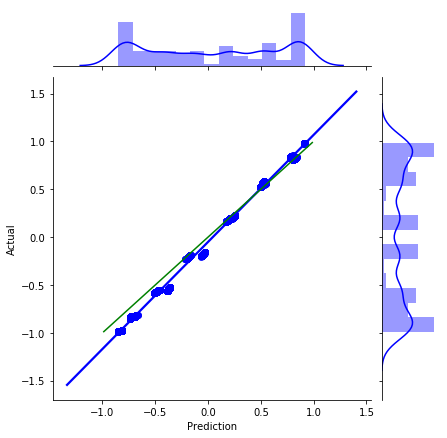

In [11]:
model.plot_scatter(x_test,y_test)

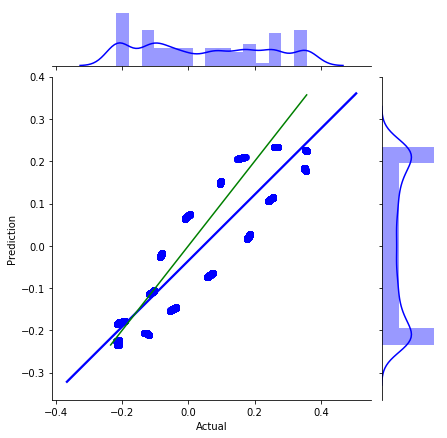

In [12]:
model.plot_scatter_var(x_test,y_test)

# Multistep RNN on SIN wave

In [9]:
import main
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

n = 500000

points = np.linspace(start = 0,stop = 1.5*n/25 * np.pi, num = n)

x = np.sin(points[:-25])

y = np.sin(points[25:])

X = x.reshape(-1,25,1)
Y = y.reshape(-1,25,1)

x_train,x_test,y_train,y_test = train_test_split(X, Y, shuffle = False,test_size = 0.10)

model = main.RNN_multistep(
    network_sizes = [30,15],
    lstm_cells = [20,10],
    activation='tanh',
    rnn_type = 'lstm',
    dropout = 0.2,
    crop = (10,0),
    optimizer = 'adam',
    loss = 'mean_squared_error',
    metrics = None,
    n_out = 1  
)

model.fit_model(
    x_train = x_train,
    y_train = y_train,
    batch_size = 500,
    epochs = 30,
    #validation_split = 0.01,
    x_test = x_test,
    y_test = y_test,
    verbose = 1
)

pred = model.predict(x_test)

Train on 17999 samples, validate on 2000 samples
Epoch 1/30
17999/17999 [==============================] - 5s 274us/step - loss: 0.6097 - val_loss: 0.0527
Epoch 2/30
17999/17999 [==============================] - 2s 126us/step - loss: 0.2274 - val_loss: 0.0322
Epoch 3/30
17999/17999 [==============================] - 2s 125us/step - loss: 0.1659 - val_loss: 0.0212
Epoch 4/30
17999/17999 [==============================] - 3s 172us/step - loss: 0.1261 - val_loss: 0.0145
Epoch 5/30
17999/17999 [==============================] - 2s 132us/step - loss: 0.0956 - val_loss: 0.0125
Epoch 6/30
17999/17999 [==============================] - 2s 135us/step - loss: 0.0780 - val_loss: 0.0121
Epoch 7/30
17999/17999 [==============================] - 3s 164us/step - loss: 0.0675 - val_loss: 0.0116
Epoch 8/30
17999/17999 [==============================] - 3s 150us/step - loss: 0.0609 - val_loss: 0.0113
Epoch 9/30
17999/17999 [==============================] - 3s 141us/step - loss: 0.0551 - val_loss: 0.01

In [34]:
model.fit_model(
    x_train = x_train,
    y_train = y_train,
    batch_size = 500,
    epochs = 60,
    #validation_split = 0.01,
    x_test = x_test,
    y_test = y_test,
    verbose = 1
)

Train on 18999 samples, validate on 1000 samples
Epoch 1/60
18999/18999 [==============================] - 2s 89us/step - loss: 0.0020 - val_loss: 0.0066
Epoch 2/60
18999/18999 [==============================] - 2s 86us/step - loss: 0.0021 - val_loss: 0.0077
Epoch 3/60
18999/18999 [==============================] - 2s 85us/step - loss: 0.0019 - val_loss: 0.0062
Epoch 4/60
18999/18999 [==============================] - 2s 85us/step - loss: 0.0021 - val_loss: 0.0078
Epoch 5/60
18999/18999 [==============================] - 2s 86us/step - loss: 0.0021 - val_loss: 0.0077
Epoch 6/60
18999/18999 [==============================] - 2s 88us/step - loss: 0.0018 - val_loss: 0.0058
Epoch 7/60
18999/18999 [==============================] - 2s 86us/step - loss: 0.0021 - val_loss: 0.0074
Epoch 8/60
18999/18999 [==============================] - 2s 87us/step - loss: 0.0021 - val_loss: 0.0064
Epoch 9/60
18999/18999 [==============================] - 2s 86us/step - loss: 0.0018 - val_loss: 0.0071
Epoch 

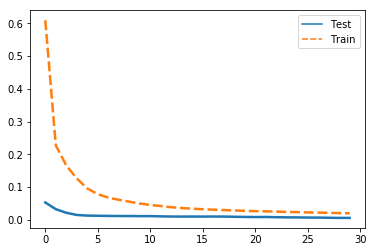

In [10]:
model.plot_loss()

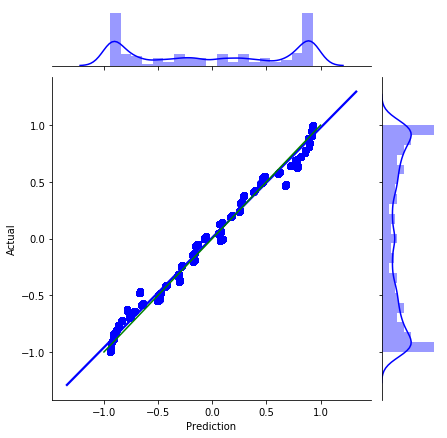

In [11]:
model.plot_scatter(x_test,y_test)

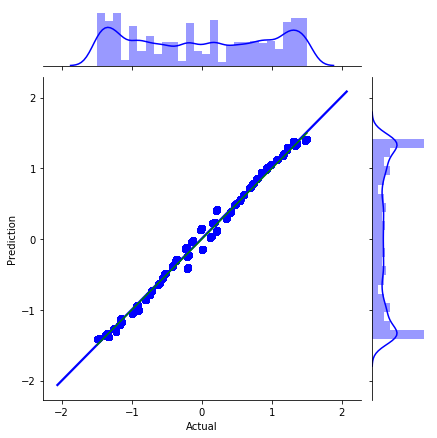

In [12]:
model.plot_scatter_var(x_test,y_test)

# Treat images

In [154]:
import PIL 
import os 

path = '/Users/matheus/Desktop/Cedro/captchas/05864.png'

def link_arr(path):
    #Convert b&w
    im = PIL.Image.open(path).convert('L')
    #Crop image
    im = im.crop( (25,30,275,75) )
    return np.array(im)#[:,:,:3]

folder = '/Users/matheus/Desktop/Cedro/captchas/'

pictures = [a for a in os.listdir(folder) if a[-4:] == '.png']

labels = np.array([a[:-4] for a in pictures])

os.chdir(folder)

pictures_arr = np.array(list(map(link_arr,pictures)))

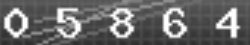

In [153]:
im = PIL.Image.open(path).convert('L')
im.crop( (25,30,275,75) )

In [132]:
a = np.array(PIL.Image.open(path).convert('L'))


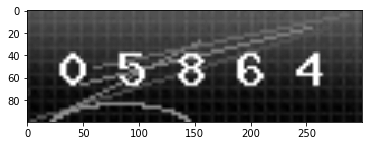

In [134]:
plt.imshow(a,cmap = 'gray')

In [155]:
import pickle

pickle.dump([pictures_arr,labels],open('/Users/matheus/Desktop/Cedro/captchas.pkl','wb'))


In [156]:
with open('/Users/matheus/Desktop/Cedro/captchas.pkl','rb') as f:
    ims, labels = pickle.load(f)

# GAN model on MNIST

## Create generator and discriminator

In [1]:
from keras.layers import Input
from keras.models import Model, Sequential
from keras.layers.core import Dense, Dropout
from keras.layers.advanced_activations import LeakyReLU
from keras.datasets import mnist
from keras.optimizers import Adam
from keras import initializers
import keras
import main
import numpy as np

optimizer = keras.optimizers.Adam(lr=0.00002, beta_1=0.5)

generator = keras.models.Sequential()
generator.add(Dense(256))#, kernel_initializer=initializers.RandomNormal(stddev=0.02)))
generator.add(LeakyReLU(0.2))

generator.add(Dense(512))
generator.add(LeakyReLU(0.2))

generator.add(Dense(1024))
generator.add(LeakyReLU(0.2))

generator.add(Dense(784, activation='tanh'))
generator.compile(loss='binary_crossentropy', optimizer=optimizer)



discriminator = Sequential()
discriminator.add(Dense(1024, input_dim=784, kernel_initializer=initializers.RandomNormal(stddev=0.02)))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dropout(0.3))

discriminator.add(Dense(512))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dropout(0.3))

discriminator.add(Dense(256))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dropout(0.3))

discriminator.add(Dense(1, activation='sigmoid'))
discriminator.compile(loss='binary_crossentropy', optimizer=optimizer)


Using TensorFlow backend.


## Model with single run

Round:  1


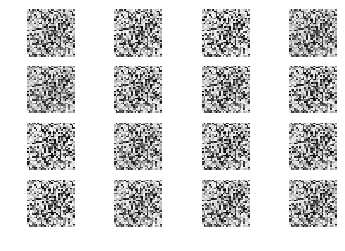

Round:  101


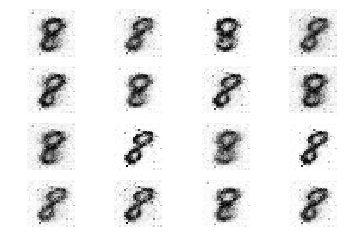

Round:  201


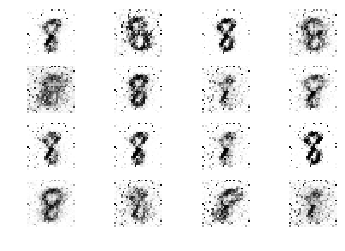

Round:  301


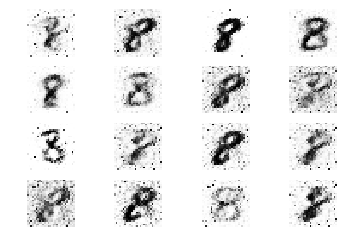

Round:  401


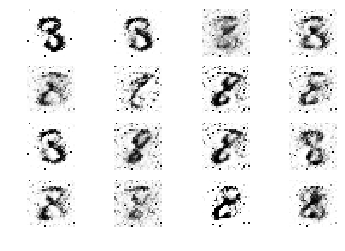

Round:  501


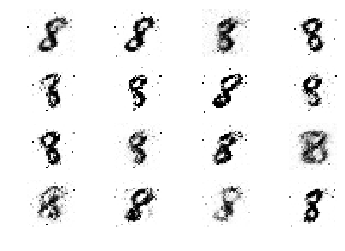

Round:  601


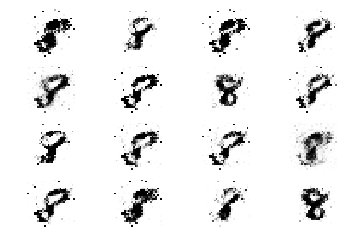

Round:  701


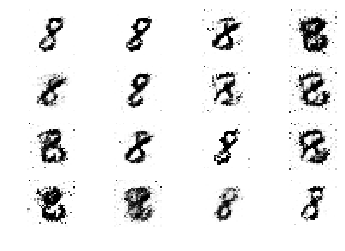

Round:  801


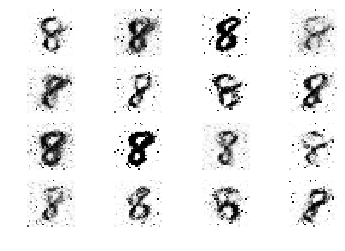

Round:  901


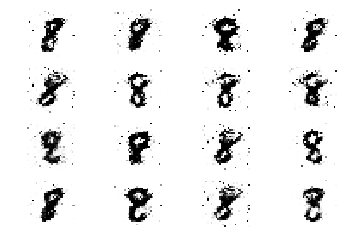

In [17]:
gan = main.GAN(generator, discriminator,optimizer=optimizer)

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

#Filter number
ind, = np.where(y_train == 8)
x_train = x_train[ind]
y_train = y_train[ind]

x_train = (x_train.astype(np.float32) - 127.5)/127.5

x_train = x_train.reshape(-1, np.prod(x_train.shape[1:]))

noise_func = lambda n: np.random.normal(0,1,[n,100])

n_show = 100

for i in range(1000):
     

    gan.train_gan(
        noise_function = noise_func,
        actual = x_train,
        smoothing = 0.9,
        size_disc = 100,
        size_gen = 100,
        verbose = 0
    )
    
    if i % n_show == 0:
        
        print('Round: ',gan.round)
        
        noise = np.random.normal(0,1,[20,100])
        
        generated = gan.predict_gan(noise)
        
        main.plot_grid(generated.reshape(-1,28,28),(4,4),cmap = 'gray_r')
    

## Model with batch run

Round:  1


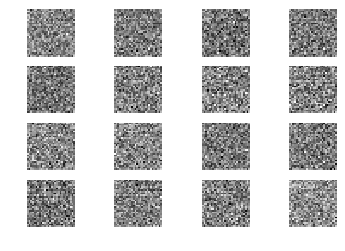

Gan loss: 0.6928
Discriminator loss: 0.5944
Round:  101


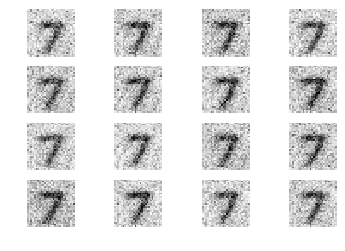

Gan loss: 0.9176
Discriminator loss: 0.5153
Round:  201


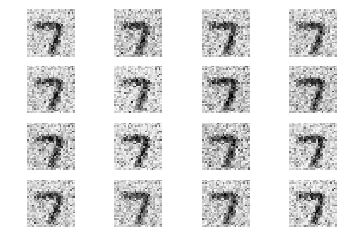

Gan loss: 1.5830
Discriminator loss: 0.3514
Round:  301


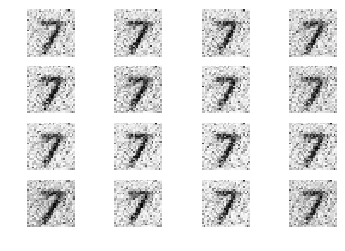

Gan loss: 2.2925
Discriminator loss: 0.3531
Round:  401


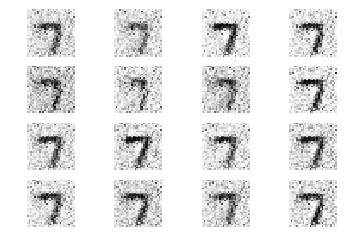

Gan loss: 2.1758
Discriminator loss: 0.3408
Round:  501


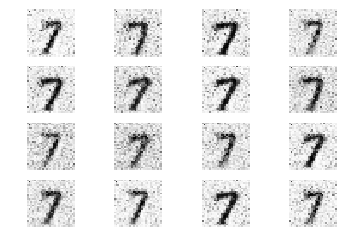

Gan loss: 2.3585
Discriminator loss: 0.3514
Round:  601


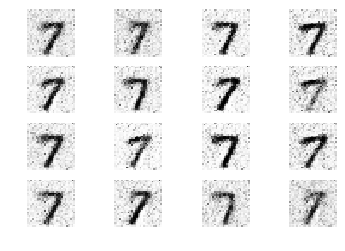

Gan loss: 1.1537
Discriminator loss: 0.3815
Round:  701


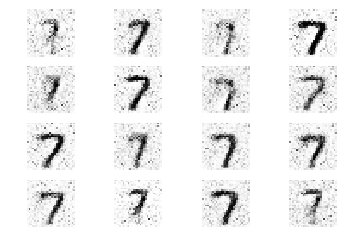

Gan loss: 1.2309
Discriminator loss: 0.3965
Round:  801


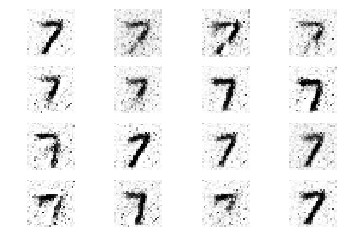

Gan loss: 1.9020
Discriminator loss: 0.3947
Round:  901


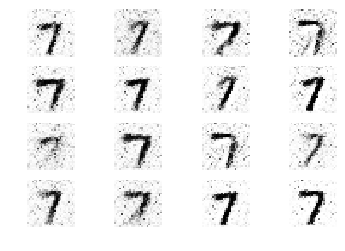

Gan loss: 2.4835
Discriminator loss: 0.3775
Round:  1001


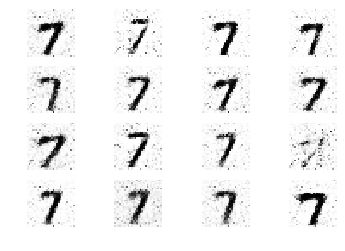

Gan loss: 2.3447
Discriminator loss: 0.3604


In [2]:
gan = main.GAN(generator, discriminator,optimizer=optimizer)

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

#Filter number
ind, = np.where(y_train == 7)
x_train = x_train[ind]
y_train = y_train[ind]

x_train = (x_train.astype(np.float32) - 127.5)/127.5

x_train = x_train.reshape(-1, np.prod(x_train.shape[1:]))

noise_func = lambda n: np.random.normal(0,1,[n,100])

gan.train_batch(
    noise_function = noise_func,
    n_do = 1001,
    actual = x_train,
    smoothing = 0.9,
    size_disc = 100,
    size_gen = 100,
    verbose = 0,
    n_show = 100,
    show_reshape = (-1,28,28),
    cmap = 'gray_r',
    grid_show = (4,4),
)

# GAN on captcha image

Image shape:  (954, 45, 250)


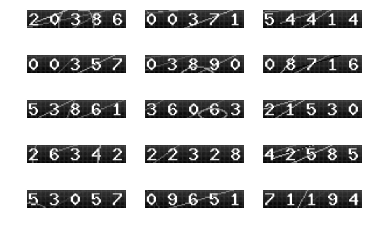

In [8]:
with open('captchas.pkl','rb') as f:
    x_train, y_train = pickle.load(f)

print('Image shape: ', x_train.shape)    
    
main.plot_grid(x_train, (5,3), cmap = 'gray')

In [38]:
from keras.layers import Input
from keras.models import Model, Sequential
from keras.layers.core import Dense, Dropout
from keras.layers.advanced_activations import LeakyReLU
from keras.datasets import mnist
from keras.optimizers import Adam
from keras import initializers
import keras
import main
import numpy as np

optimizer = keras.optimizers.Adam(lr=0.0002, beta_1=0.5)

generator = keras.models.Sequential()
generator.add(keras.layers.core.Dense(1000))#, kernel_initializer=initializers.RandomNormal(stddev=0.02)))
generator.add(keras.layers.advanced_activations.LeakyReLU(0.2))

generator.add(keras.layers.core.Dense(5000))
generator.add(keras.layers.advanced_activations.LeakyReLU(0.2))

generator.add(keras.layers.core.Dense(10000))
generator.add(keras.layers.advanced_activations.LeakyReLU(0.2))

generator.add(keras.layers.core.Dense(11250, activation='tanh'))
generator.compile(loss='binary_crossentropy', optimizer=optimizer)



discriminator = keras.models.Sequential()
discriminator.add(keras.layers.core.Dense(10000))
discriminator.add(keras.layers.advanced_activations.LeakyReLU(0.2))
discriminator.add(keras.layers.core.Dropout(0.3))

discriminator.add(keras.layers.core.Dense(5000))
discriminator.add(keras.layers.advanced_activations.LeakyReLU(0.2))
discriminator.add(keras.layers.core.Dropout(0.3))

discriminator.add(keras.layers.core.Dense(1000))
discriminator.add(keras.layers.advanced_activations.LeakyReLU(0.2))
discriminator.add(keras.layers.core.Dropout(0.3))

discriminator.add(keras.layers.core.Dense(1, activation='sigmoid'))
discriminator.compile(loss='binary_crossentropy', optimizer=optimizer)



Round:  0
Training Discriminator:
Epoch 1/1
200/200 [==============================] - 282s 1s/step - loss: 0.7971
Training Generator:
Epoch 1/1
200/200 [==============================] - 536s 3s/step - loss: 1.8392ETA: 3:23 - loss: 3
Round:  1


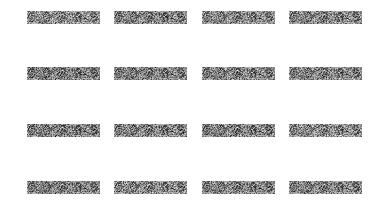

Round:  1
Training Discriminator:
Epoch 1/1


KeyboardInterrupt: 

In [40]:


gan = main.GAN(generator, discriminator,optimizer=optimizer)

with open('captchas.pkl','rb') as f:
    x_train, y_train = pickle.load(f)

x_train = (x_train.astype(np.float32) - 127.5)/127.5

x_train = x_train.reshape(-1, np.prod(x_train.shape[1:]))

noise_func = lambda n: np.random.normal(0,1,[n,100])

gan.train_batch(
    noise_function = noise_func,
    n_do = 10,
    actual = x_train,
    smoothing = 0.9,
    size_disc = 100,
    size_gen = 200,
    verbose = 1,
    n_show = 1,
    show_reshape = (-1,45,250),
    cmap = 'gray_r',
    grid_show = (4,4),
)